<a href="https://colab.research.google.com/github/Masinga244/Activities/blob/main/Exam_(Masinga_N_22426770).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Number: 22426770
### Student Surname and initails: Masinga N


# Introduction


The South African Crime Statistics dataset (Q4 2024/2025) contains detailed records of recored crimes across all nine provinces, categorized by crime type; icluding contact crimes (for example murder, assault, robbery), property related crimes and crimes detected through police action. The dataset has multiple years (2021-2025) which will allow both spatial analysis of crime hotspots and temporal forecasting of crime trends. This dataset is important for data driven crime analytics, as it will help identfy high risk areas, monitor changes in criminal activity, and support evidence based decision-making for resource allocation, policing strategies, and community safety planning across South Africa.

# Load Dataset

i started by importing all necessary libraries for data handling, visualization, classification, forecasting, geospatial analysis.

In [97]:
# Import essential libraries for Crime Analytics Project
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning (Classification)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import statsmodels.api as sm

# Geospatial visualization (optional)
import geopandas as gpd
import folium

# Utility
import warnings
warnings.filterwarnings('ignore')

# Display setup
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)


Allows loading local files into Google Colab.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 2024-2025_Q4_crime_stats.xlsx to 2024-2025_Q4_crime_stats.xlsx


Load Excel file and inspect sheet names

In [6]:
xls = pd.ExcelFile("2024-2025_Q4_crime_stats.xlsx")
print(xls.sheet_names)

['Lookup lists', 'RAW Data', 'Crime stats per component', 'Crime stats RSA & PHO summary', 'TOP30 stations', 'TOP30 stations CDPA', 'Prov TOP30 stations', 'Prov TOP30 stations CDPA']


loading the dataset with the releavent sheet (tables) that i will be working with

In [22]:
df1 = pd.read_excel("2024-2025_Q4_crime_stats.xlsx", sheet_name="Crime stats per component", skiprows=12)
df2 = pd.read_excel("2024-2025_Q4_crime_stats.xlsx", sheet_name="TOP30 stations", skiprows=12)

print(df1.head())


   Unnamed: 0  Unnamed: 1                                     CRIME CATEGORY  \
0         NaN         NaN        CONTACT CRIMES (CRIMES AGAINST THE  PERSON)   
1         NaN         NaN                                             Murder   
2         NaN         NaN                                    Sexual offences   
3         NaN         NaN                                   Attempted murder   
4         NaN         NaN  Assault with the intent to inflict grievous bo...   

   January 2021 to \nMarch 2021  January 2022 to \nMarch 2022  \
0                           NaN                           NaN   
1                        4976.0                        6083.0   
2                       12133.0                       13799.0   
3                        4582.0                        5717.0   
4                       36417.0                       42992.0   

   January 2023 to \nMarch 2023  January 2024 to \nMarch 2024  \
0                           NaN                           NaN  

# Understanding the datasets

Check columns, head, and descriptive statistics to understand the data

In [10]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'CRIME CATEGORY',
       'January 2021 to \nMarch 2021', 'January 2022 to \nMarch 2022',
       'January 2023 to \nMarch 2023', 'January 2024 to \nMarch 2024',
       'January 2025 to \nMarch 2025', 'Count Diff', '(%) Change',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [12]:
df1.describe()

,Unnamed: 0,Unnamed: 1,January 2021 to \nMarch 2021,January 2022 to \nMarch 2022,January 2023 to \nMarch 2023,January 2024 to \nMarch 2024,January 2025 to \nMarch 2025,Count Diff,Unnamed: 10,Unnamed: 11
count,0.0,0.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,0.0,0.0
mean,NaN,NaN,30443.179487,33585.358974,34568.000000,35264.179487,33888.974359,-1375.205128,NaN,NaN
std,NaN,NaN,60064.507476,65880.806239,68412.080808,69251.815049,65482.060332,4746.304968,NaN,NaN
min,NaN,NaN,1.000000,5.000000,0.000000,0.000000,0.000000,-23179.000000,NaN,NaN
25%,NaN,NaN,3848.500000,4121.000000,4235.500000,4291.000000,4278.000000,-1776.000000,NaN,NaN
50%,NaN,NaN,9549.000000,10818.000000,11744.000000,12395.000000,11111.000000,-771.000000,NaN,NaN
75%,NaN,NaN,33350.000000,36871.500000,37539.500000,36909.000000,35418.000000,3.000000,NaN,NaN
max,NaN,NaN,347920.000000,380387.000000,394389.000000,398186.000000,375007.000000,9686.000000,NaN,NaN


In [24]:
df2.head()

,Unnamed: 0,Unnamed: 1,RSA Position,Prov Position,Station,District,Province,January 2021 to \nMarch 2021,January 2022 to \nMarch 2022,January 2023 to \nMarch 2023,January 2024 to \nMarch 2024,January 2025 to \nMarch 2025,Count Diff,(%) Change,Unnamed: 14,Unnamed: 15
0,NaN,NaN,RSA,PHO,Sta,Dis,Prov,P1,P2,P3,P4,P5,Dif,Cha,NaN,NaN
1,NaN,NaN,1,1,Cape Town Central,City of Cape Town District,Western Cape,1720,2653,3079,3322,3102,-220,-0.066225,NaN,NaN
2,NaN,NaN,2,1,Durban Central,eThekwini District,KwaZulu-Natal,1820,2037,2386,2207,2044,-163,-0.073856,NaN,NaN
3,NaN,NaN,3,2,Phoenix,eThekwini District,KwaZulu-Natal,1434,1816,1927,1979,1976,-3,-0.001516,NaN,NaN
4,NaN,NaN,4,2,Mfuleni,City of Cape Town District,Western Cape,1344,1433,1817,1953,1938,-15,-0.00768,NaN,NaN


In [23]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'RSA Position', 'Prov Position', 'Station',
       'District', 'Province', 'January 2021 to \nMarch 2021',
       'January 2022 to \nMarch 2022', 'January 2023 to \nMarch 2023',
       'January 2024 to \nMarch 2024', 'January 2025 to \nMarch 2025',
       'Count Diff', '(%) Change', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [40]:
df2.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 14,Unnamed: 15
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


# Clean Dataset

keep columns that i need(df1)

In [13]:
df_clean = df1[['CRIME CATEGORY',
                'January 2021 to \nMarch 2021',
                'January 2022 to \nMarch 2022',
                'January 2023 to \nMarch 2023',
                'January 2024 to \nMarch 2024',
                'January 2025 to \nMarch 2025']]



drop extra headers or empty rows

In [14]:
df_clean = df_clean.dropna(subset=['January 2021 to \nMarch 2021',
                                   'January 2022 to \nMarch 2022',
                                   'January 2023 to \nMarch 2023',
                                   'January 2024 to \nMarch 2024',
                                   'January 2025 to \nMarch 2025'],
                           how='all')


renaming the columns

In [15]:
df_clean = df_clean.rename(columns={
    'CRIME CATEGORY': 'Crime_Category',
    'January 2021 to \nMarch 2021': '2021',
    'January 2022 to \nMarch 2022': '2022',
    'January 2023 to \nMarch 2023': '2023',
    'January 2024 to \nMarch 2024': '2024',
    'January 2025 to \nMarch 2025': '2025'
})


changing the table from wide to long

In [18]:
df_long = df_clean.melt(id_vars=['Crime_Category'],
                        var_name='Year',
                        value_name='Count')

# ensuring that count is numeric
df_long['Count'] = pd.to_numeric(df_long['Count'], errors='coerce')

# dropping mising values
df_long = df_long.dropna(subset=['Count'])

#converting year to int
df_long['Year'] = df_long['Year'].astype(int)

print(df_long.head())

                                      Crime_Category  Year    Count
0                                             Murder  2021   4976.0
1                                    Sexual offences  2021  12133.0
2                                   Attempted murder  2021   4582.0
3  Assault with the intent to inflict grievous bo...  2021  36417.0
4                                     Common assault  2021  38889.0


In [43]:
df_clean.columns

Index(['Crime_Category', '2021', '2022', '2023', '2024', '2025'], dtype='object')

melting df_clean into long table format this will help me with EDA

In [44]:
df_clean_long = df_clean.melt(
    id_vars=['Crime_Category'],
    value_vars=['2021','2022','2023','2024','2025'],
    var_name='Year',
    value_name='Count'
)

# Convert 'Year' to integer
df_clean_long['Year'] = df_clean_long['Year'].astype(int)

df_clean_long.head()


,Crime_Category,Year,Count
0,Murder,2021,4976.0
1,Sexual offences,2021,12133.0
2,Attempted murder,2021,4582.0
3,Assault with the intent to inflict grievous bo...,2021,36417.0
4,Common assault,2021,38889.0


cleaning df2
Drop unnecessary columns.
Rename columns for clarity.
Drop rows with missing station data.
Convert numeric columns.
Melt to long format (quarterly incidents).

In [27]:
cols_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 14', 'Unnamed: 15']
df2_clean = df2.drop(columns=cols_to_drop)

# renaming columns so i can work with them better
df2_clean = df2_clean.rename(columns={
    'RSA Position': 'rsa_pos',
    'Prov Position': 'prov_pos',
    'Station': 'station',
    'District': 'district',
    'Province': 'province',
    'January 2021 to \nMarch 2021': 'Q1_2021',
    'January 2022 to \nMarch 2022': 'Q1_2022',
    'January 2023 to \nMarch 2023': 'Q1_2023',
    'January 2024 to \nMarch 2024': 'Q1_2024',
    'January 2025 to \nMarch 2025': 'Q1_2025',
    'Count Diff': 'count_diff',
    '(%) Change': 'pct_change'
})



In [33]:

df2_clean = df2_clean[df2_clean['station'].notna()]

# reset index
df2_clean = df2_clean.reset_index(drop=True)

numeric_cols = ['Q1_2021','Q1_2022','Q1_2023','Q1_2024','Q1_2025','count_diff','pct_change']
for col in numeric_cols:
    df2_clean[col] = pd.to_numeric(df2_clean[col], errors='coerce')


In [35]:
df_melt = df2_clean.melt(
    id_vars=['rsa_pos','prov_pos','station','district','province'],
    value_vars=['Q1_2021','Q1_2022','Q1_2023','Q1_2024','Q1_2025'],
    var_name='quarter',
    value_name='incidents'
)


In [37]:
df_melt = df2_clean.melt(
    id_vars=['rsa_pos','prov_pos','station','district','province'],
    value_vars=['Q1_2021','Q1_2022','Q1_2023','Q1_2024','Q1_2025'],
    var_name='quarter',
    value_name='incidents'
)


In [38]:
# Quick overview of rows, columns, dtypes, and null counts
df_melt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rsa_pos    155 non-null    object 
 1   prov_pos   155 non-null    object 
 2   station    155 non-null    object 
 3   district   155 non-null    object 
 4   province   155 non-null    object 
 5   quarter    155 non-null    object 
 6   incidents  150 non-null    float64
dtypes: float64(1), object(6)
memory usage: 8.6+ KB


In [39]:
df_melt.head()

,rsa_pos,prov_pos,station,district,province,quarter,incidents
0,RSA,PHO,Sta,Dis,Prov,Q1_2021,NaN
1,1,1,Cape Town Central,City of Cape Town District,Western Cape,Q1_2021,1720.0
2,2,1,Durban Central,eThekwini District,KwaZulu-Natal,Q1_2021,1820.0
3,3,2,Phoenix,eThekwini District,KwaZulu-Natal,Q1_2021,1434.0
4,4,2,Mfuleni,City of Cape Town District,Western Cape,Q1_2021,1344.0


# EDA

Barplot – crime counts per category by year

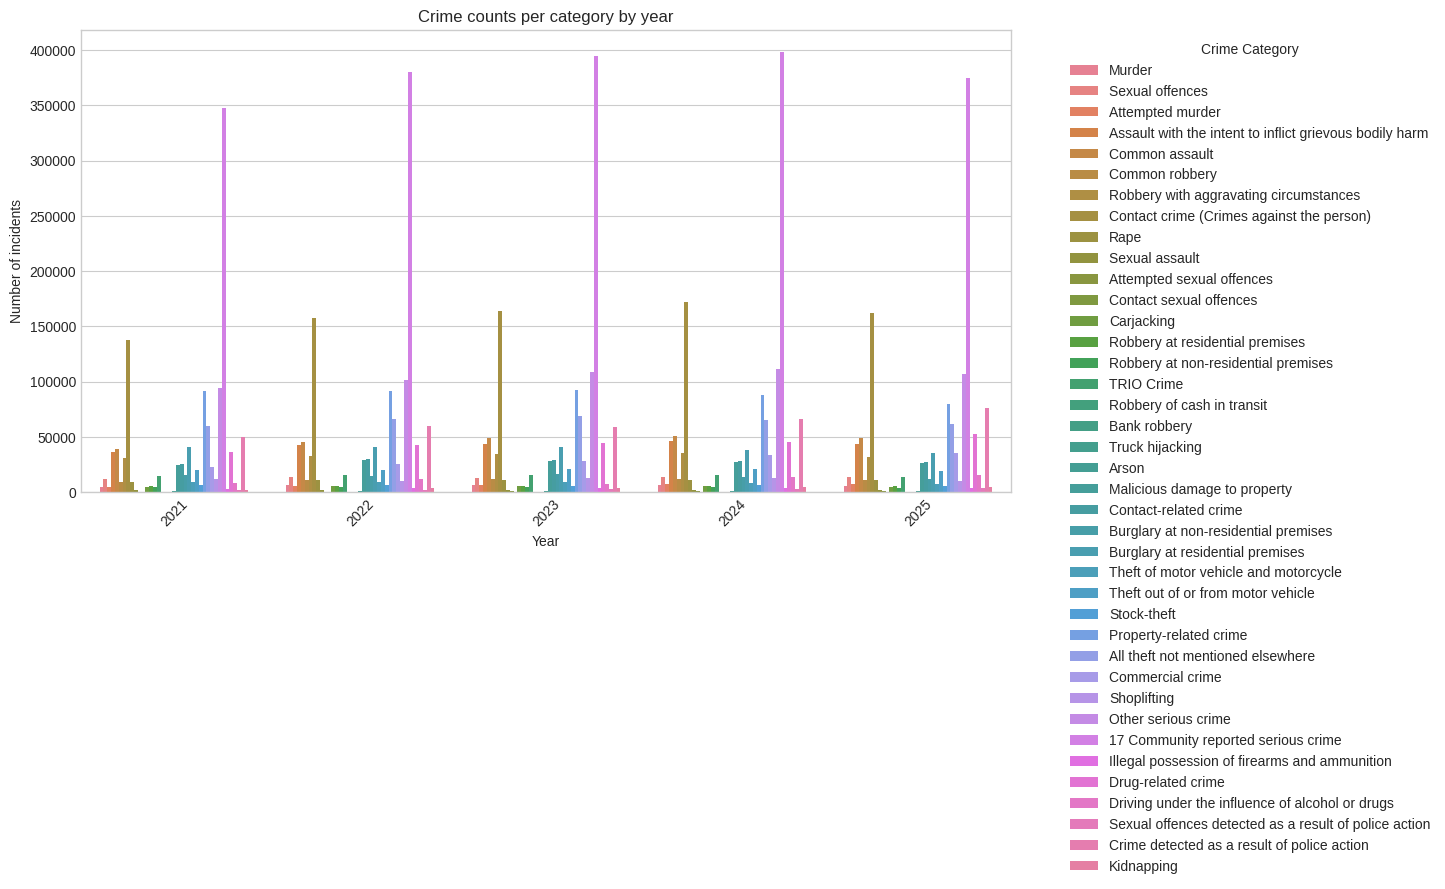

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean_long, x='Year', y='Count', hue='Crime_Category')
plt.title("Crime counts per category by year")
plt.ylabel("Number of incidents")
plt.xticks(rotation=45)
plt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1))
plt.show()


Line plot – trends for selected crime categories

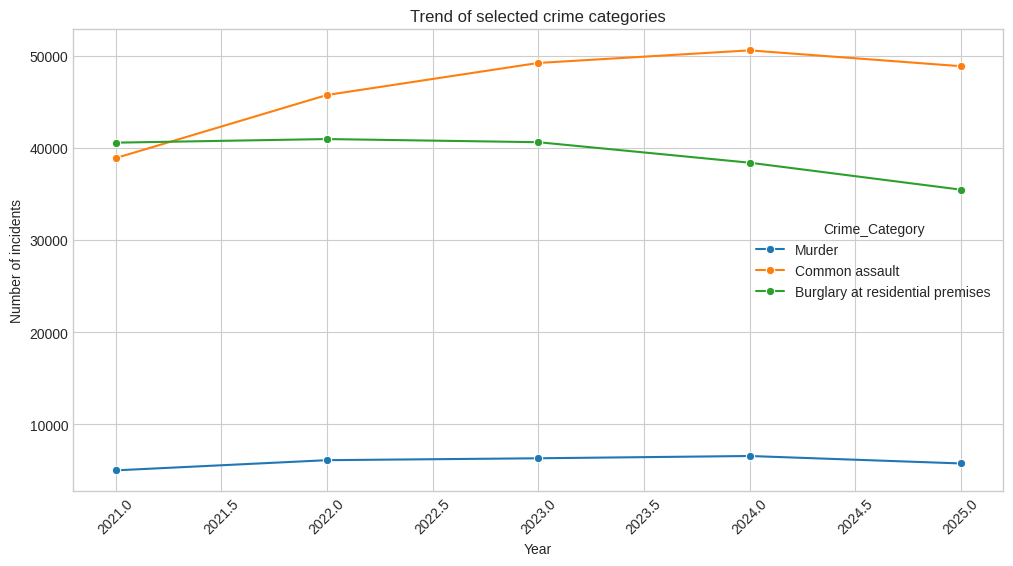

In [47]:
#Line plot for selected crimes
selected_crimes = ['Murder','Burglary at residential premises','Common assault']
plt.figure(figsize=(12,6))
sns.lineplot(data=df_clean_long[df_clean_long['Crime_Category'].isin(selected_crimes)],
             x='Year', y='Count', hue='Crime_Category', marker='o')
plt.title("Trend of selected crime categories")
plt.ylabel("Number of incidents")
plt.xticks(rotation=45)
plt.show()

Heatmap – category × year

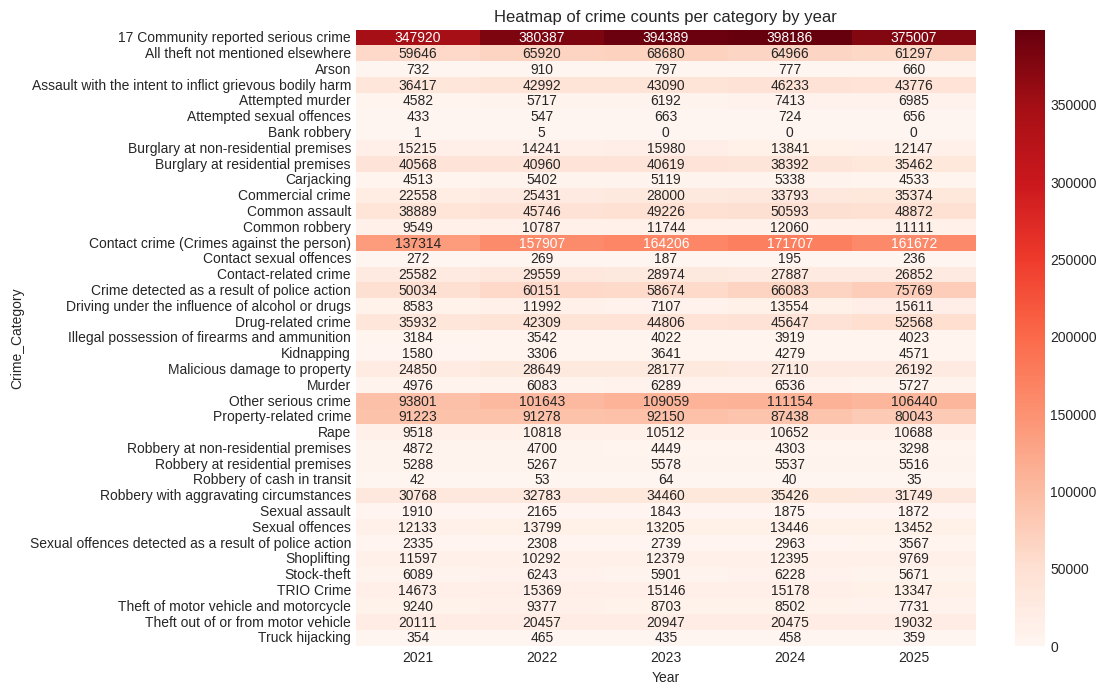

In [48]:
# c) Heatmap (category × year)
heatmap_data = df_clean_long.pivot(index='Crime_Category', columns='Year', values='Count')
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds")
plt.title("Heatmap of crime counts per category by year")
plt.show()

Top stations – line plot

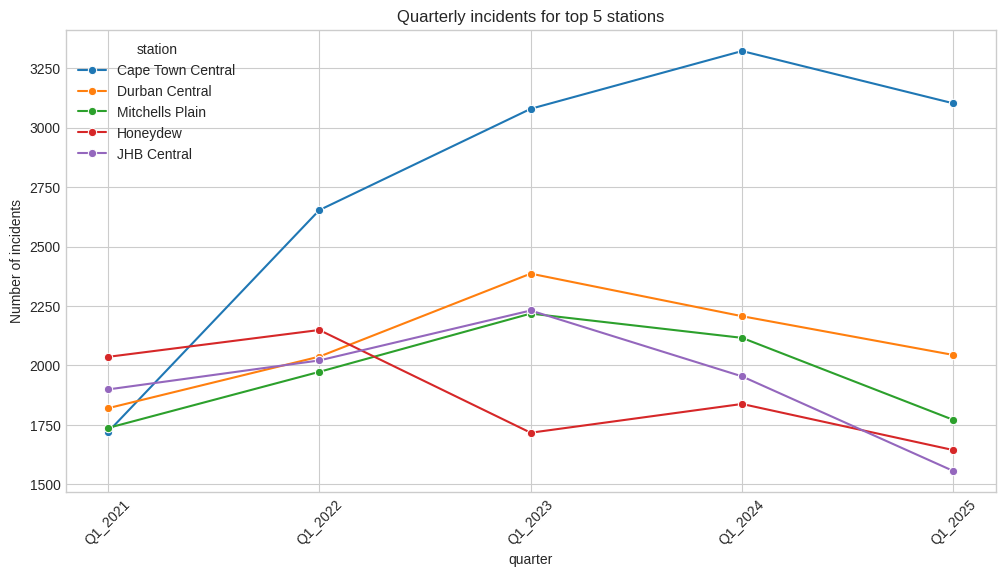

In [49]:
top_stations = df_melt.groupby('station')['incidents'].sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melt[df_melt['station'].isin(top_stations)],
             x='quarter', y='incidents', hue='station', marker='o')
plt.title("Quarterly incidents for top 5 stations")
plt.ylabel("Number of incidents")
plt.xticks(rotation=45)
plt.show()


Hotspot labeling

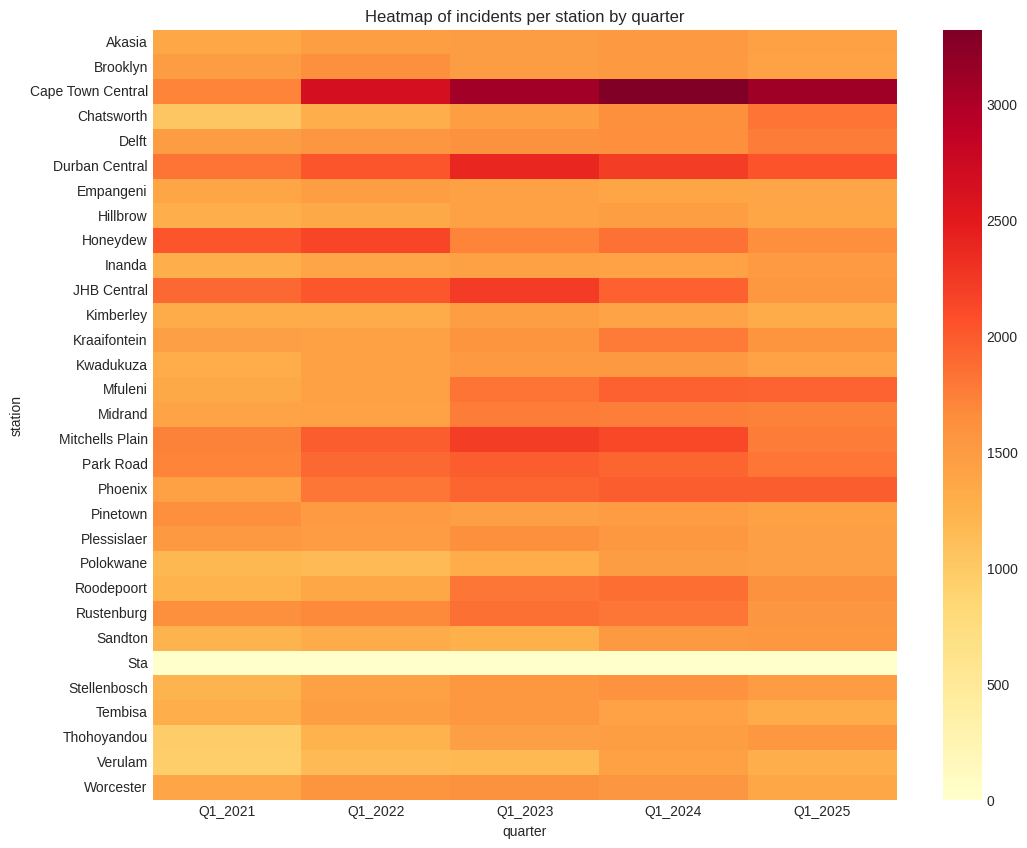

In [50]:
heatmap_df = df_melt.pivot_table(index='station', columns='quarter', values='incidents', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_df, cmap="YlOrRd")
plt.title("Heatmap of incidents per station by quarter")
plt.show()

Distribution of incidents per provinc

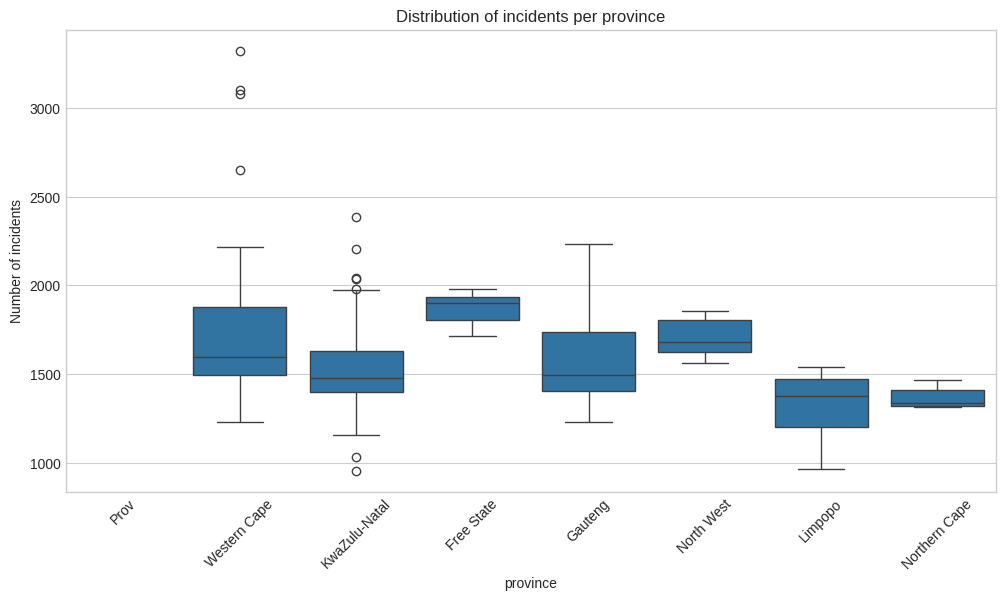

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_melt, x='province', y='incidents')
plt.title("Distribution of incidents per province")
plt.ylabel("Number of incidents")
plt.xticks(rotation=45)
plt.show()

Hotspot labeling by station

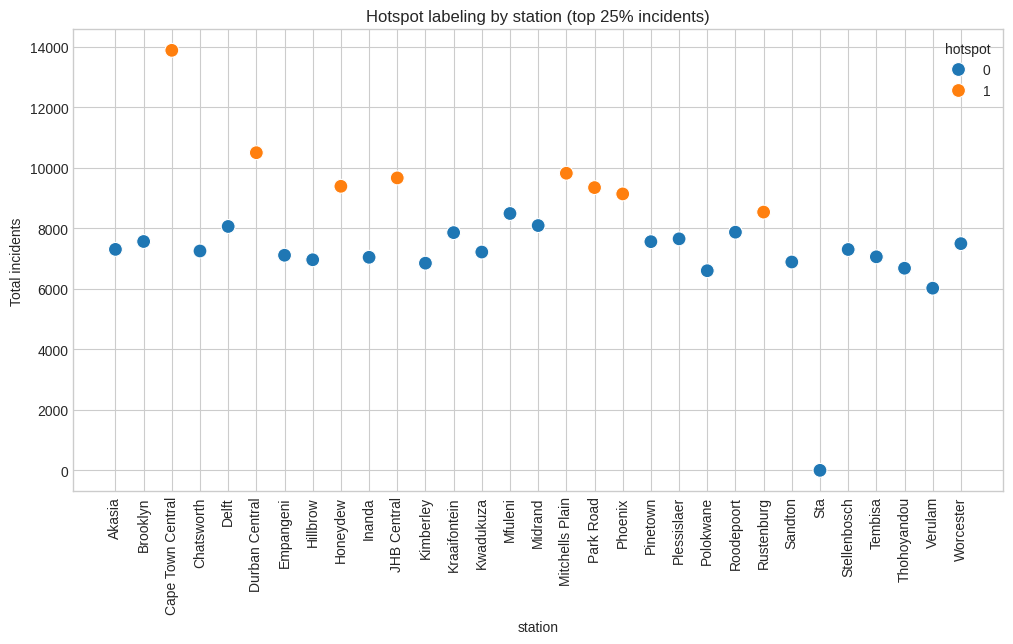

In [52]:
station_total = df_melt.groupby('station')['incidents'].sum().reset_index()
threshold = station_total['incidents'].quantile(0.75)
station_total['hotspot'] = (station_total['incidents'] >= threshold).astype(int)

plt.figure(figsize=(12,6))
sns.scatterplot(data=station_total, x='station', y='incidents', hue='hotspot', s=100)
plt.xticks(rotation=90)
plt.title("Hotspot labeling by station (top 25% incidents)")
plt.ylabel("Total incidents")
plt.show()

# Data Modeling

classification modeling

In [53]:
# separate total incidents per station
station_total = df_melt.groupby('station')['incidents'].sum().reset_index()
threshold = station_total['incidents'].quantile(0.75)
station_total['hotspot'] = (station_total['incidents'] >= threshold).astype(int)

# Merge hotspot label back to df_melt
df_class = df_melt.merge(station_total[['station','hotspot']], on='station')

# Features i am using are  incidents, province, district, quarter
df_class = pd.get_dummies(df_class, columns=['province','district','quarter'], drop_first=True)

X = df_class.drop(columns=['station','rsa_pos','prov_pos','hotspot'])
y = df_class['hotspot']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Standardizing the  features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)


evaluating the classification

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9354838709677419

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.78      0.88         9

    accuracy                           0.94        31
   macro avg       0.96      0.89      0.92        31
weighted avg       0.94      0.94      0.93        31


Confusion Matrix:
 [[22  0]
 [ 2  7]]


The forecasting model will predict future incidents

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztseexyi/oi8gxkua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztseexyi/s8_9otiy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39928', 'data', 'file=/tmp/tmpztseexyi/oi8gxkua.json', 'init=/tmp/tmpztseexyi/s8_9otiy.json', 'output', 'file=/tmp/tmpztseexyi/prophet_model9s6vwc53/prophet_model-20251006103236.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

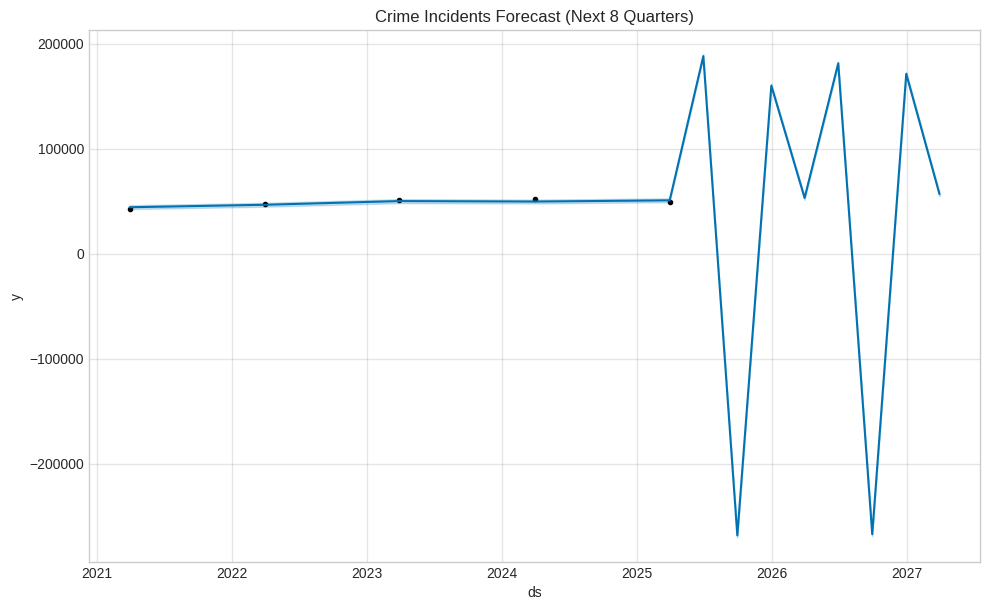

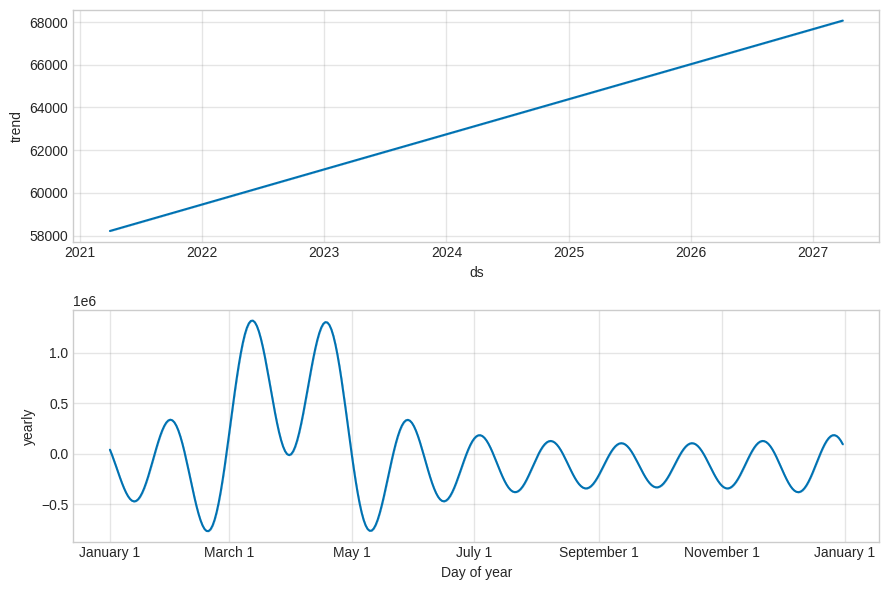

In [56]:
# Prepare time series (example: total incidents per quarter)
ts = df_melt.groupby('quarter')['incidents'].sum().reset_index()
ts['ds'] = pd.to_datetime(ts['quarter'].map({
    'Q1_2021':'2021-03-31',
    'Q1_2022':'2022-03-31',
    'Q1_2023':'2023-03-31',
    'Q1_2024':'2024-03-31',
    'Q1_2025':'2025-03-31'
}))
ts['y'] = ts['incidents']

# Prophet model
model = Prophet()
model.fit(ts[['ds','y']])

# Forecast next 8 quarters (~2 years)
future = model.make_future_dataframe(periods=8, freq='Q')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Crime Incidents Forecast (Next 8 Quarters)")
plt.show()

# Plot components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()

Evaluating the forecasting model

In [59]:
actual = ts['y'].values[-4:]  # last 4 quarters
predicted = forecast['yhat'].values[-12:-8]  # corresponding predictions

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1349.39
RMSE: 1507.24


In [95]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from prophet import Prophet
import numpy as np

# Load data
df_clean = pd.read_csv("df_clean.csv")
df_melt = pd.read_csv("df_melt.csv")

# Melt df_clean for plotting
df_clean_long = df_clean.melt(id_vars=['Crime_Category'],
                              value_vars=['2021','2022','2023','2024','2025'],
                              var_name='Year', value_name='Count')
df_clean_long['Year'] = df_clean_long['Year'].astype(int)

# Sidebar filters
st.sidebar.header("Filters")
crime_options = df_clean_long['Crime_Category'].unique().tolist()
selected_crimes = st.sidebar.multiselect("Crime Category", crime_options, default=crime_options)

province_options = df_melt['province'].unique().tolist()
selected_provinces = st.sidebar.multiselect("Province", province_options, default=province_options)

year_options = df_clean_long['Year'].unique().tolist()
selected_years = st.sidebar.slider("Year Range", min_value=min(year_options),
                                   max_value=max(year_options), value=(min(year_options), max(year_options)))

# Filter data
df_clean_filtered = df_clean_long[(df_clean_long['Crime_Category'].isin(selected_crimes)) &
                                  (df_clean_long['Year'] >= selected_years[0]) &
                                  (df_clean_long['Year'] <= selected_years[1])]
df_melt_filtered = df_melt[(df_melt['province'].isin(selected_provinces))]

# -------------------------------
# EDA plots
# -------------------------------
st.header("EDA: Crime Trends")

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_clean_filtered, x='Year', y='Count', hue='Crime_Category', ax=ax)
plt.xticks(rotation=45)
st.pyplot(fig)

# -------------------------------
# Hotspot classification
# -------------------------------
st.header("Hotspot Classification")

# Hotspot labeling
station_total = df_melt.groupby('station')['incidents'].sum().reset_index()
threshold = station_total['incidents'].quantile(0.75)
station_total['hotspot'] = (station_total['incidents'] >= threshold).astype(int)
df_class = df_melt.merge(station_total[['station','hotspot']], on='station')
df_class = pd.get_dummies(df_class, columns=['province','district','quarter'], drop_first=True)

X = df_class.drop(columns=['station','rsa_pos','prov_pos','hotspot'])
y = df_class['hotspot']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled, y)
y_pred = clf.predict(X_scaled)

st.subheader("Classification Metrics")
st.text(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
st.text("Confusion Matrix:")
st.write(confusion_matrix(y, y_pred))
st.text("Classification Report:")
st.text(classification_report(y, y_pred))

# -------------------------------
# Forecasting with Prophet
# -------------------------------
st.header("Time Series Forecasting")

ts = df_melt_filtered.groupby('quarter')['incidents'].sum().reset_index()
ts['ds'] = pd.to_datetime(ts['quarter'].map({
    'Q1_2021':'2021-03-31','Q1_2022':'2022-03-31','Q1_2023':'2023-03-31',
    'Q1_2024':'2024-03-31','Q1_2025':'2025-03-31'
}))
ts['y'] = ts['incidents']

model = Prophet()
model.fit(ts[['ds','y']])
future = model.make_future_dataframe(periods=8, freq='Q')
forecast = model.predict(future)

# Display MAE & RMSE
actual = ts['y'].values[-4:]
predicted = forecast['yhat'].values[-12:-8]
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

st.subheader("Forecast Accuracy")
st.text(f"Mean Absolute Error (MAE): {mae:.2f}")
st.text(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Forecast plots
st.subheader("Forecast Plot")
fig1 = model.plot(forecast)
st.pyplot(fig1)

st.subheader("Forecast Components")
fig2 = model.plot_components(forecast)
st.pyplot(fig2)


Overwriting app.py


# Streamlit

In [98]:
!pip install streamlit cloudflared -q


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.2 MB/s eta 0:00:00


In [101]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from prophet import Prophet

# ---------------------------
# Title and Description
# ---------------------------
st.title("🚨 Crime Analytics Dashboard")
st.write("""
This Streamlit app allows you to explore crime data trends (2021–2025), identify hotspots,
and forecast future incidents.
""")

# ---------------------------
# Embedded Dataset
# ---------------------------
st.subheader("📘 Crime Dataset")
data_crime = {
    "Crime_Category": ["Murder", "Sexual offences", "Assault", "Burglary"],
    "2021": [4976, 12133, 36417, 20000],
    "2022": [6083, 13799, 42992, 22000],
    "2023": [6289, 13205, 43090, 24000],
    "2024": [6536, 13446, 46233, 25000],
    "2025": [6720, 14000, 48000, 26000]
}
df_clean = pd.DataFrame(data_crime)

# Melt for long format (for plotting)
df_long = df_clean.melt(id_vars=['Crime_Category'], var_name='Year', value_name='Count')
df_long['Year'] = df_long['Year'].astype(int)

st.dataframe(df_clean)

# ---------------------------
# EDA Plots
# ---------------------------
st.subheader("📈 Crime Trends by Category")
selected_crimes = st.multiselect("Select Crime Categories:", df_clean['Crime_Category'].unique(), default=df_clean['Crime_Category'].unique())
plot_data = df_long[df_long['Crime_Category'].isin(selected_crimes)]

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=plot_data, x='Year', y='Count', hue='Crime_Category', marker='o', ax=ax)
ax.set_ylabel("Number of Incidents")
ax.set_title("Crime Trends Over Years")
st.pyplot(fig)

# ---------------------------
# Hotspot Analysis
# ---------------------------
st.subheader("📍 Hotspot Analysis")
# Simple rule: top 25% incidents as hotspots
df_hotspot = df_long.groupby('Crime_Category')['Count'].sum().reset_index()
threshold = df_hotspot['Count'].quantile(0.75)
df_hotspot['Hotspot'] = (df_hotspot['Count'] >= threshold).astype(int)

st.dataframe(df_hotspot)

fig2, ax2 = plt.subplots(figsize=(10,6))
sns.barplot(data=df_hotspot, x='Crime_Category', y='Count', hue='Hotspot', palette={0:'blue', 1:'red'}, ax=ax2)
ax2.set_title("Crime Hotspots by Category")
st.pyplot(fig2)

# ---------------------------
# Classification Modeling
# ---------------------------
st.subheader("🧠 Hotspot Classification (Simulated)")
# Simulate incidents per "station" for classification
df_class = pd.DataFrame({
    'station': ['A','B','C','D','E'],
    'incidents': [48000, 43000, 20000, 25000, 12000],
})
threshold_class = df_class['incidents'].quantile(0.75)
df_class['hotspot'] = (df_class['incidents'] >= threshold_class).astype(int)

# Features and labels
X = df_class[['incidents']]
y = df_class['hotspot']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

st.write(f"**Accuracy:** {accuracy_score(y_test, y_pred):.2f}")
st.write("**Classification Report:**")
st.text(classification_report(y_test, y_pred))
st.write("**Confusion Matrix:**")
st.text(confusion_matrix(y_test, y_pred))

# ---------------------------
# Forecasting Incidents
# ---------------------------
st.subheader("🔮 Forecast Future Incidents")

# Time series for total incidents
ts = df_long.groupby('Year')['Count'].sum().reset_index()
ts = ts.rename(columns={'Year':'ds', 'Count':'y'})
ts['ds'] = pd.to_datetime(ts['ds'].astype(str))

# Prophet model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(ts[['ds','y']])

# Forecast next 3 years
future = model.make_future_dataframe(periods=3, freq='Y')
forecast = model.predict(future)

fig3 = model.plot(forecast)
st.pyplot(fig3)
st.write("Forecasted incidents for next 3 years:")
st.dataframe(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(3))

st.success("✅ All analyses completed successfully!")



Overwriting app.py


In [100]:
!streamlit run app.py & npx cloudflared tunnel --url http://localhost:8501


⠙

⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.39.64:8501

⠴⠦⠧⠇⠏⠋⠙⠹2025-10-06T12:55:11Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-10-06T12:55:11Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-10-06T12:55:14Z INF +--------------------------------------------------------------------------------------------+
2025-10-06T12:

# Drone Simulation

Start by choosing the area you want to cover and pick a projection for positions: every hotspot or precinct location you have from the crime analysis comes as geographic coordinates (latitude and longitude). To work easily in a grid measured in metres (for example 1 km × 1 km cells) you convert those lat/lon coordinates into a planar coordinate system (an easting/northing or local Cartesian system) so distances and directions are simple to compute. Once coordinates are in metres, you define a rectangular horizontal grid over the study area where each cell is 1,000 m by 1,000 m. The grid is indexed with integer row/column coordinates (x, y): i increases in the north–south direction and j increases in the east–west direction (or vice versa, as long as you state it). Each cell covers a known bounding box in the projected coordinates (e.g., x from 0–1000 m and y from 0–1000 m for cell (0,0)), so assigning a hotspot to a cell is just checking which cell’s bounding box contains the hotspot’s (x, y) point.

To make it three‑dimensional you add discrete altitude layers above each horizontal cell. Instead of representing altitude as a continuous number for mapping, the 3D frame splits altitude into bands (for example Low: 30–60 m, Mid: 60–120 m, High: 120–200 m). Combining a horizontal cell (x, y) with an altitude band z gives a 3D voxel (x, y, z).
A hotspot becomes a point of interest (POI) by storing its projected (x, y) coordinates, optionally a representative altitude (z) if monitoring from a particular height, and a severity or priority score (for example the incident rate).

Position updates happen at discrete time steps (for example every second or every minute). During each step the drone’s (x, y, z) are advanced based on its speed, heading, and climb/descent limits; the simulator then converts the new (x, y, z) into the grid indices if voxel-level logic (collision, no‑fly, or POI visits) is needed. Distance calculations and routing are easiest in the projected Cartesian coordinates (x, y) — use straight‑line distances for quick estimates, and grid/voxel pathfinding when you need obstacle avoidance or altitude separation.

